<a href="https://colab.research.google.com/github/nishitmv/ML/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

df = pd.read_csv("/content/sample_data/Classification_train.csv")

# Remove rows where 'Label' is 3
df = df[df['Label'] != 3]

#df = df.sample(n=1000, random_state=42).reset_index(drop=True)

features = df.drop(columns=["Date", "Time", "Label"]).values.astype('float32')
labels = df["Label"].values.astype('int')

features_tensor = torch.tensor(features)
labels_tensor = torch.tensor(labels)


features_train, features_test, labels_train, labels_test = train_test_split(features_tensor, labels_tensor, test_size=0.2, random_state=42)
scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

features_train_scaled = torch.tensor(features_train_scaled).to(torch.float32)
features_test_scaled = torch.tensor(features_test_scaled).to(torch.float32)

train_features_dataloader = DataLoader(features_train_scaled, shuffle=False)
labels_train_dataloader = DataLoader(labels_train,  shuffle=False)
test_features_dataloader = DataLoader(features_test_scaled, shuffle=False)
labels_test_dataloader = DataLoader(labels_test,  shuffle=False)

print(labels_train_dataloader)
print(train_features_dataloader)
#

cpu


In [13]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 2)
        )

def forward(self, x):
        x = self.flatten(x)
        logits = model(x)
        return logits

epochs=5
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 counter = 0
 size = len(train_features_dataloader.dataset)
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):
  counter+=1
  output = model(feature)
  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  if(counter % 500 == 0):
    loss, current = loss.item(), counter * len(feature)
    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



torch.Size([7080, 56])
loss: 0.188706  [  500/ 5664]
loss: 0.031983  [ 1000/ 5664]
loss: 0.072614  [ 1500/ 5664]
loss: 0.000039  [ 2000/ 5664]
loss: 0.065758  [ 2500/ 5664]
loss: 0.000000  [ 3000/ 5664]
loss: 0.002781  [ 3500/ 5664]
loss: 0.000000  [ 4000/ 5664]
loss: 0.000000  [ 4500/ 5664]
loss: 0.000000  [ 5000/ 5664]
loss: 0.000000  [ 5500/ 5664]
loss: 0.255543  [  500/ 5664]
loss: 0.001088  [ 1000/ 5664]
loss: 0.000002  [ 1500/ 5664]
loss: 0.000000  [ 2000/ 5664]
loss: 0.253014  [ 2500/ 5664]
loss: 0.000000  [ 3000/ 5664]
loss: 0.000634  [ 3500/ 5664]
loss: 0.000000  [ 4000/ 5664]
loss: 0.000000  [ 4500/ 5664]
loss: 0.000000  [ 5000/ 5664]
loss: 0.000000  [ 5500/ 5664]
loss: 0.109082  [  500/ 5664]
loss: 0.000004  [ 1000/ 5664]
loss: 0.000451  [ 1500/ 5664]
loss: 0.000000  [ 2000/ 5664]
loss: 0.000002  [ 2500/ 5664]
loss: 0.000000  [ 3000/ 5664]
loss: 0.000537  [ 3500/ 5664]
loss: 0.000000  [ 4000/ 5664]
loss: 0.000000  [ 4500/ 5664]
loss: 0.000000  [ 5000/ 5664]
loss: 0.000000  [

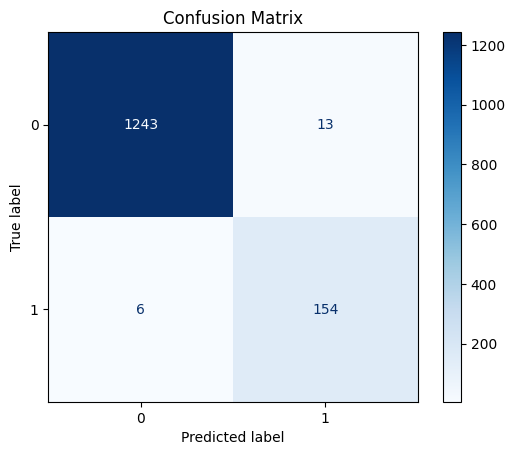

1397
1416
Test Accuracy: 98.66%


In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [15]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")



torch.Size([7080, 56])
Epoch 1/20, Loss: 0.0006275591440498829
Epoch 2/20, Loss: 3.790783375734463e-05
Epoch 3/20, Loss: 9.775113539944869e-06
Epoch 4/20, Loss: 3.933898824470816e-06
Epoch 5/20, Loss: 1.7881377516459906e-06
Epoch 6/20, Loss: 9.536738616588991e-07
Epoch 7/20, Loss: 5.960462772236497e-07
Epoch 8/20, Loss: 3.576278118089249e-07
Epoch 9/20, Loss: 2.3841855067985307e-07
Epoch 10/20, Loss: 2.3841855067985307e-07
Epoch 11/20, Loss: 1.1920928244535389e-07
Epoch 12/20, Loss: 1.1920928244535389e-07
Epoch 13/20, Loss: 1.1920928244535389e-07
Epoch 14/20, Loss: 0.0
Epoch 15/20, Loss: 0.0
Epoch 16/20, Loss: 0.0
Epoch 17/20, Loss: 0.0
Epoch 18/20, Loss: 0.0
Epoch 19/20, Loss: 0.0
Epoch 20/20, Loss: 0.0


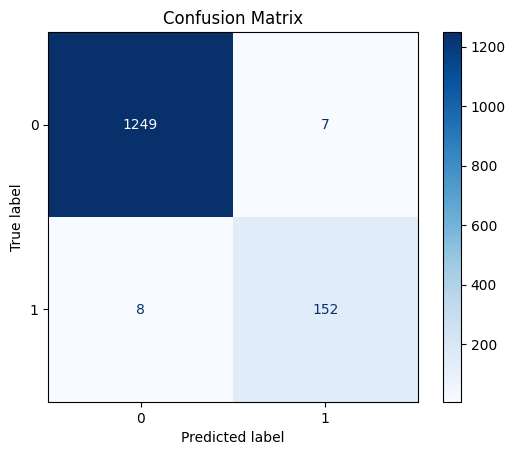

1401
1416
Test Accuracy: 98.94%


In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [ ]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


torch.Size([7080, 55])
Epoch 1/20, Loss: 0.5600709319114685
Epoch 2/20, Loss: 0.44888246059417725
Epoch 3/20, Loss: 0.47052308917045593
Epoch 4/20, Loss: 0.4355638027191162
Epoch 5/20, Loss: 0.4214754104614258
Epoch 6/20, Loss: 0.48303738236427307
Epoch 7/20, Loss: 0.43345004320144653
Epoch 8/20, Loss: 5.695292949676514
Epoch 9/20, Loss: 0.3777337074279785
Epoch 10/20, Loss: 0.5524433851242065
Epoch 11/20, Loss: 0.43219661712646484
Epoch 12/20, Loss: 0.2558917999267578
Epoch 13/20, Loss: 0.3155288100242615
Epoch 14/20, Loss: 0.3768174648284912
Epoch 15/20, Loss: 0.4388313293457031
Epoch 16/20, Loss: 0.1899043321609497
Epoch 17/20, Loss: 0.37691500782966614
Epoch 18/20, Loss: 0.3769243061542511
Epoch 19/20, Loss: 0.5022397041320801
Epoch 20/20, Loss: 0.2518562078475952
Test Accuracy: 88.70%


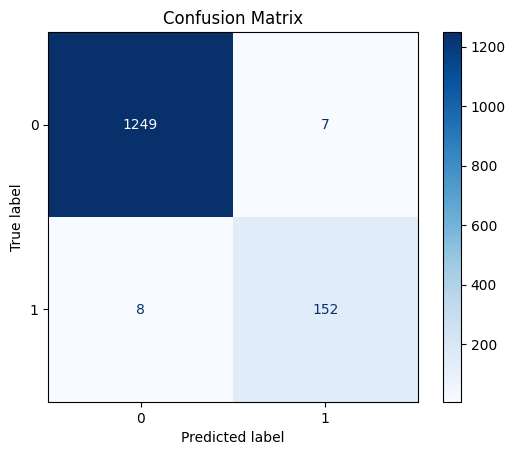

1401
1416
Test Accuracy: 98.94%


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

torch.Size([7080, 56])
Epoch 1/20, Loss: 0.03879441320896149
Epoch 2/20, Loss: 0.0907236859202385
Epoch 3/20, Loss: 0.1308937668800354
Epoch 4/20, Loss: 0.08410067111253738
Epoch 5/20, Loss: 0.14035001397132874
Epoch 6/20, Loss: 0.11076805740594864
Epoch 7/20, Loss: 0.11763064563274384
Epoch 8/20, Loss: 0.12761545181274414
Epoch 9/20, Loss: 0.13103985786437988
Epoch 10/20, Loss: 0.11052621901035309
Epoch 11/20, Loss: 0.12395235896110535
Epoch 12/20, Loss: 0.12353776395320892
Epoch 13/20, Loss: 0.10313217341899872
Epoch 14/20, Loss: 0.0775621309876442
Epoch 15/20, Loss: 0.11757256835699081
Epoch 16/20, Loss: 0.12960582971572876
Epoch 17/20, Loss: 0.1279444545507431
Epoch 18/20, Loss: 0.11459948122501373
Epoch 19/20, Loss: 0.13371510803699493
Epoch 20/20, Loss: 0.11905760318040848
[[1256    0]
 [ 160    0]]
[[1256    0]
 [ 160    0]]
[[1256    0]
 [ 160    0]]
[[1256    0]
 [ 160    0]]
[[1256    0]
 [ 160    0]]
[[1256    0]
 [ 160    0]]
[[1256    0]
 [ 160    0]]
[[1256    0]
 [ 160  

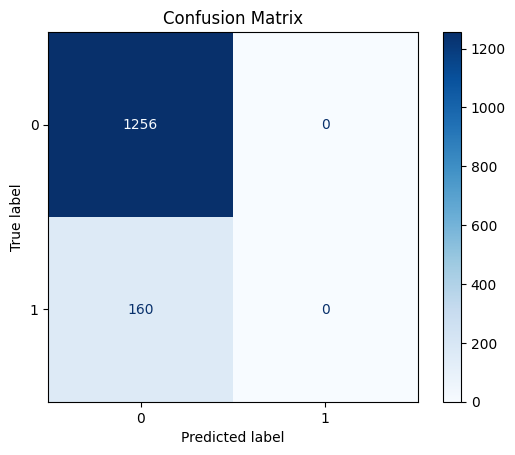

Test Accuracy: 88.70%


In [7]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(64, 2)
        )

epochs=20
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label.long())
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")


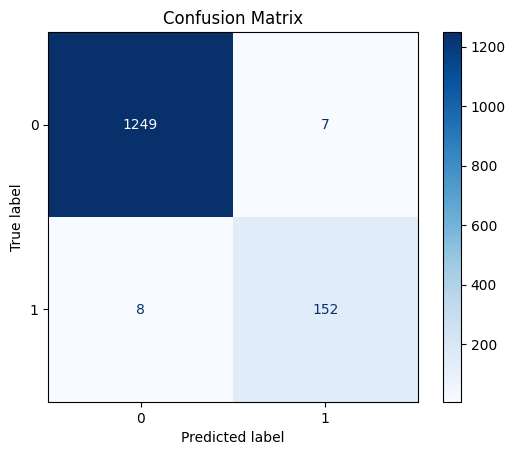

1401
1416
Test Accuracy: 98.94%


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [17]:
import torch.nn as nn
import torch.optim as optim

print(features_tensor.shape)

model = nn.Sequential(
            nn.Linear(features_tensor.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )

epochs=10
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

for epoch in range(epochs):
 model.train()
 for feature, label in zip(train_features_dataloader, labels_train_dataloader):

  optimizer.zero_grad()
  output = model(feature)
  loss = loss_func(output, label)
  loss.backward()
  optimizer.step()
 print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")



torch.Size([7080, 56])
Epoch 1/10, Loss: 0.0
Epoch 2/10, Loss: 0.0
Epoch 3/10, Loss: 0.0
Epoch 4/10, Loss: 0.0
Epoch 5/10, Loss: 0.0
Epoch 6/10, Loss: 0.0
Epoch 7/10, Loss: 0.0
Epoch 8/10, Loss: 0.0
Epoch 9/10, Loss: 0.0
Epoch 10/10, Loss: 0.0


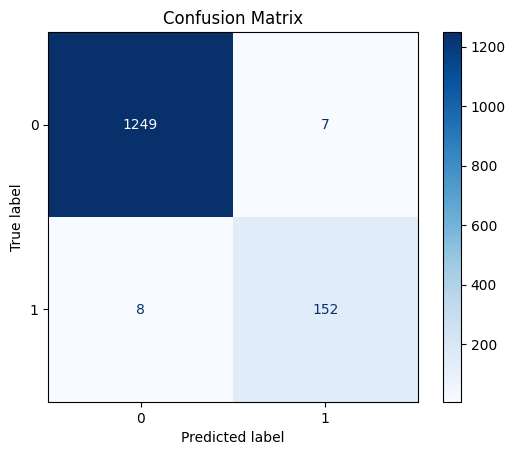

1401
1416
Test Accuracy: 98.94%


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
correct = 0
total = 0
all_labels =[]
all_predictions=[]
with torch.no_grad():
  for feature_test, label_test in zip(test_features_dataloader, labels_test_dataloader):
    predicted = model(feature_test)
    total += 1
    correct += (predicted.argmax(1) == label_test).type(torch.int).sum().item()
    all_labels.extend(label_test.numpy())
    all_predictions.extend(predicted.argmax(1).numpy())
  cm = confusion_matrix(all_labels, all_predictions)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix')
  plt.show()
  print(correct)
  print(total)
  print(f"Test Accuracy: {100 * correct / total:.2f}%")